In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm

import os
import csv
from natsort import natsorted

%matplotlib inline

# DT

In [2]:
df = pd.read_pickle('Data/Processed Data/ML/DT-ml.pkl')

In [3]:
df.head()

,name,pagerank,core_periphery,degree_centrality,count,headline_count,text_count
0,AAG Jinnah,0.000070,3,0.000296,1,0.0,1
1,AK Nasim Khan,0.000099,1,0.000099,1,0.0,1
2,AKM Yusuf,0.000035,1,0.000099,1,0.0,4
3,AKMA Hamid,0.000033,1,0.000099,1,0.0,1
4,AQM Badruddoza Chowdhury,0.000089,3,0.000395,5,0.0,5


In [4]:
X = df[['count', 'headline_count', 'text_count']]
y = df['core_periphery']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [6]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

In [7]:
# print(classification_report(y_test, y_pred))

In [8]:
# print(confusion_matrix(y_test, y_pred))

In [9]:
logreg.score(X_test, y_test) # If we include degree centrality and pagerank, logreg score is 60.5%

0.5271739130434783

In [10]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [11]:
print(knn.score(X_test, y_test)) # If we include degree centrality and pagerank, knn score is 81%

0.5148221343873518


In [12]:
clf = svm.SVC(gamma=0.001, C=100, verbose=True)

In [13]:
clf.fit(X_train, y_train)

[LibSVM]

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [14]:
print(clf.score(X_test, y_test)) # If we include degree centrality and pagerank, svm score is 60.6%

0.5395256916996047


In [15]:
df['core_periphery'].max()

9

### Changing all core ranks in DT greater than 4 to 5

In [16]:
df.loc[df['core_periphery'] > 4, 'core_periphery'] = 5

In [17]:
df['core_periphery'].shape

(10116,)

In [18]:
df[df['core_periphery']==1].shape

(5221, 7)

In [19]:
df[df['core_periphery']==2].shape

(2343, 7)

In [20]:
df[df['core_periphery']==3].shape

(1206, 7)

In [21]:
df[df['core_periphery']==4].shape

(617, 7)

In [22]:
df[df['core_periphery']==5].shape

(729, 7)

In [23]:
df['core_periphery'].max()

5

In [24]:
X = df[['count', 'headline_count', 'text_count']]
y = df['core_periphery']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test) # If we include degree centrality and pagerank, logreg score is %

0.5602766798418972

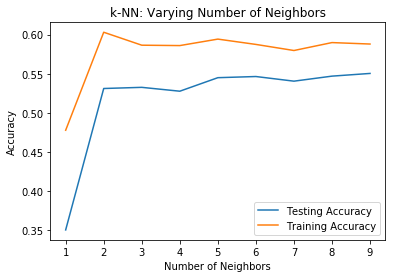

In [27]:
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [28]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test) # If we include degree centrality and pagerank, knn score is %

0.5311264822134387

In [29]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test) # If we include degree centrality and pagerank, svm score is %

[LibSVM]

0.5657114624505929

In [30]:
y_pred = logreg.predict(X_test)

In [31]:
y_pred[np.where(y_pred==1)].shape

(1789,)

In [32]:
y_pred[np.where(y_pred>1)].shape

(235,)

## DS

In [33]:
df = pd.read_pickle('Data/Processed Data/ML/DS-ml.pkl')

In [34]:
df.head()

,name,pagerank,core_periphery,degree_centrality,count,headline_count,text_count
0,AJ Faisel,0.000022,1,0.000022,1,0.0,2.0
1,AJM Nasir,0.000007,1,0.000022,3,0.0,4.0
2,AJM Nasir Uddin,0.000027,4,0.000153,16,0.0,17.0
3,AK Abdul Momen,0.000005,1,0.000022,4,0.0,3.0
4,AK Antony,0.000043,6,0.000285,62,0.0,63.0


In [35]:
X = df[['count', 'headline_count', 'text_count']]
y = df['core_periphery']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [37]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test) # If we include degree centrality and pagerank, logreg score is 37.2%

0.37242820992408404

In [38]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn.score(X_test, y_test) # If we include degree centrality and pagerank, knn score is 71.4%

0.3508636813730883

In [39]:
# clf = svm.SVC(gamma=0.001, C=100, verbose=True)
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

### Changing core ranks from 39 to 5 buckets

In [40]:
df = pd.read_pickle('Data/Processed Data/ML/DS-ml.pkl')

In [41]:
df['core_periphery'].max()

39

In [42]:
df['core_periphery'].shape

(45445,)

In [43]:
df[df['core_periphery']==1].shape[0]

16771

In [44]:
df[df['core_periphery']==2].shape[0]

9140

In [45]:
df[(df['core_periphery']>2) & (df['core_periphery']<=4)].shape[0]

9349

In [46]:
df[(df['core_periphery']>4) & (df['core_periphery']<=7)].shape[0]

5516

In [47]:
df[df['core_periphery']>7].shape[0]

4669

In [6]:
# df[(df['core_periphery']>2) & (df['core_periphery']<=4)] = 3
# df[(df['core_periphery']>4) & (df['core_periphery']<=7)] = 4
# df[df['core_periphery']>7] = 5

def bucket(core_periphery):
    if core_periphery > 2 and core_periphery <= 4:
        return 3
    elif core_periphery > 4 and core_periphery <= 7:
        return 4
    elif core_periphery > 7:
        return 5
    else:
        return core_periphery

In [ ]:
df['core_periphery'] = df['core_periphery'].apply(bucket)

In [49]:
df['core_periphery'].min(), df['core_periphery'].max()

(1, 5)

In [50]:
X = df[['count', 'headline_count', 'text_count']]
y = df['core_periphery']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [52]:
X_train.shape, X_test.shape

((36356, 3), (9089, 3))

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test) # If we include degree centrality and pagerank, logreg score is %

0.41984816811530423

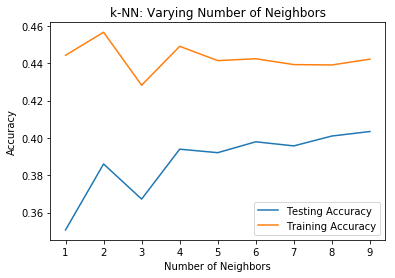

In [54]:
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [55]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test) # If we include degree centrality and pagerank, knn score is %

0.3860710749257344

In [56]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

[LibSVM]

0.4250192540433491

# New Age

In [57]:
df = pd.read_pickle('Data/Processed Data/ML/NA-ml.pkl')

In [58]:
df.head()

,name,pagerank,core_periphery,degree_centrality,count,headline_count,text_count
0,A H Mahmood Ali,0.000011,1,0.000042,1,0.0,1
1,A. Garfunkel,0.000042,2,0.000084,2,0.0,2
2,A. Ramaswami Mudaliar,0.000022,2,0.000084,1,0.0,1
3,AAM Kaoser,0.000042,2,0.000084,1,0.0,1
4,AB Mirza,0.000020,2,0.000084,1,0.0,1


In [59]:
df.shape

(23664, 7)

In [60]:
X = df[['count', 'headline_count', 'text_count']]
y = df['core_periphery']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [62]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test) # If we include degree centrality and pagerank, logreg score is %

0.34312275512360024

In [63]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn.score(X_test, y_test) # If we include degree centrality and pagerank, knn score is %

0.33044580604267904

In [64]:
clf = svm.SVC(gamma=0.001, C=100, verbose=True)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

[LibSVM]

0.3469258398478766

### Changing core ranks from 35 to 5 buckets

In [65]:
df = pd.read_pickle('Data/Processed Data/ML/NA-ml.pkl')

In [66]:
df['core_periphery'].max()

35

In [67]:
df['core_periphery'].shape

(23664,)

In [68]:
df[df['core_periphery']==1].shape[0]

8004

In [69]:
df[df['core_periphery']==2].shape[0]

4707

In [70]:
df[(df['core_periphery']>2) & (df['core_periphery']<=4)].shape[0]

4861

In [71]:
df[(df['core_periphery']>4) & (df['core_periphery']<=7)].shape[0]

3208

In [72]:
df[df['core_periphery']>7].shape[0]

2884

In [73]:
# df[(df['core_periphery']>2) & (df['core_periphery']<=4)] = 3
# df[(df['core_periphery']>4) & (df['core_periphery']<=7)] = 4
# df[df['core_periphery']>7] = 5

df['core_periphery'] = df['core_periphery'].apply(bucket)

In [74]:
df['core_periphery'].min(), df['core_periphery'].max()

(1, 5)

In [75]:
X = df[['count', 'headline_count', 'text_count']]
y = df['core_periphery']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [77]:
X_train.shape, X_test.shape

((18931, 3), (4733, 3))

In [78]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test) # If we include degree centrality and pagerank, logreg score is %

0.38051975491231776

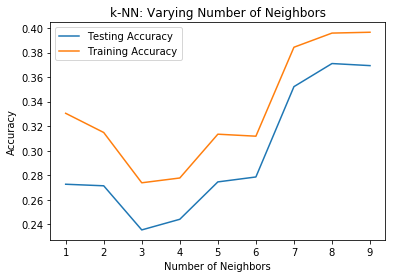

In [79]:
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [80]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn.score(X_test, y_test) # If we include degree centrality and pagerank, knn score is %

0.3710120431016269

In [81]:
clf = svm.SVC(gamma=0.001, C=100, verbose=True)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

[LibSVM]

0.38453412212127613

# Trying classification on different time intervals

## Done for 3 newspapers and 3 intervals here together

In [44]:
ds_month_interval = os.listdir('/home/shoumik/Documents/Research/Data/Processed Data/Intervals/NA/1 month')
ds_month_interval = natsorted(ds_month_interval)

In [45]:
clf = svm.SVC(gamma=0.001, C=100)
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=2)

for index, file in enumerate(ds_month_interval):
    # print(index+1)
    df = pd.read_pickle('Data/Processed Data/Intervals/NA/1 month/'+ file)
    df['core_periphery'] = df['core_periphery'].apply(bucket)
    # df.loc[df['core_periphery'] > 4, 'core_periphery'] = 5 # Only for DT - use instead of bucket
    df.fillna(0, inplace=True)
    
    X = df[['count', 'headline_count', 'text_count']]
    y = df['core_periphery']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
    
    
    with open('Data/Processed Data/Intervals/NA/1 month/results.csv', 'a') as outfile:
        writer = csv.writer(outfile)
        
        try:
            logreg.fit(X_train, y_train)
            writer.writerow(["Logistic accuracy for " + file, logreg.score(X_test, y_test) * 100])
        except(ValueError):
            print("One core found")
            writer.writerow(["Logistic accuracy for " + file, "ONLY ONE CORE EXISTS"])
        
        try:
            knn.fit(X_train, y_train)
            writer.writerow(["KNN accuracy for " + file, knn.score(X_test, y_test) * 100])
        except(ValueError):
            writer.writerow(["Logistic accuracy for " + file, "ONLY ONE CORE EXISTS"])
        
        try:
            clf.fit(X_train, y_train)
            writer.writerow(["SVM accuracy for " + file, clf.score(X_test, y_test) * 100])
        except(ValueError):
            writer.writerow(["Logistic accuracy for " + file, "ONLY ONE CORE EXISTS"])
            
        writer.writerow([])
    